In [56]:
#Dataset 
from sklearn.datasets import load_iris
#KMeans
from sklearn.cluster import KMeans
#DBSCAN
from sklearn.cluster import DBSCAN
#Hiearchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
#Standardizing Data
from sklearn.preprocessing import StandardScaler
#Metric evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [57]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [59]:
#KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans_labels=kmeans.fit_predict(df_scaled)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [60]:
#DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan_labels=dbscan.fit_predict(df_scaled)

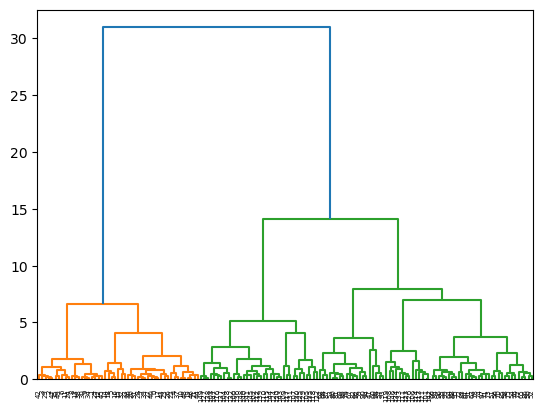

In [61]:
#Hierarchal Clustering
linkage_matrix=linkage(df_scaled, method='ward')
dendrogram(linkage_matrix)
from sklearn.cluster import AgglomerativeClustering
agg_clust=AgglomerativeClustering(n_clusters=3)
agg_labels=agg_clust.fit_predict(df_scaled)

In [63]:
#Metric
#1
kmeans_silhouette=silhouette_score(df_scaled,kmeans_labels)
kmeans_db_index=davies_bouldin_score(df_scaled,kmeans_labels)
print("Silhouette score (Kmeans):",kmeans_silhouette)
print("Davies Bouldin Score (KMeans)",kmeans_db_index)
#2
dbscan_silhouette=silhouette_score(df_scaled,dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
dbscan_db_indedf=davies_bouldin_score(df_scaled,dbscan_labels)
print("Silhouette score (DBSCAN):",dbscan_silhouette)
print("Davies Bouldin Score (DBSCAN)",dbscan_db_indedf)
#3
agg_silhouette = silhouette_score(df_scaled, agg_labels)
dbscan_db_indedf=davies_bouldin_score(df_scaled, dbscan_labels)
print("Silhouette score (Hierarchal Clustering):",agg_silhouette)
print("Davies Bouldin Score (Hierarchal Clustering)",dbscan_db_indedf)

Silhouette score (Kmeans): 0.477178745137644
Davies Bouldin Score (KMeans) 0.8389372722512615
Silhouette score (DBSCAN): 0.22342548624684605
Davies Bouldin Score (DBSCAN) 2.5387139388163353
Silhouette score (Hierarchal Clustering): 0.4701940120593938
Davies Bouldin Score (Hierarchal Clustering) 2.5387139388163353
